# Tutorial for using the new analysis API

This file outlines the various analysis API defined in the latest iteratation of the CAMAC software base. The flow of the program is as follows:
1. Recorded data file is stored as .bin
2. The .bin is processed by sas_analysis.py file to create .ftr file
3. The following script is then used to read the .ftr file and create analysis plots

In [1]:
# Needed libraries
import feather
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import andrews_curves
import sys
from MuonDataFrame import *

## Dataframe 

The following are the query terms *(strings)* for the dataframe: `'event_num', 'event_time', 'deadtime', 'TDC_L1_L', 'TDC_L1_R','TDC_L2_L', 'TDC_L2_R', 'ADC', 'TDC' , 'numChannelsRead', 'L1_asym','L2_asym', 'L1_TDC_sum', 'L2_TDC_sum', 'L1_TDC_diff', 'L2_TDC_diff', 'TDC_hit_num' `

The following cell shows how to instantiate a MuonDataFrame object

In [2]:
# variable storing the path to .ftr file
ifile = "processed_data/events_data_frame_510.ftr"

# pass on the path to the MuonDataFrame object
mdf = MuonDataFrame(ifile)

## MuonDataFrame Methods

The following cell blocks explains the various methods accessible to the MuonDataFrame object

### Displaying the data frame
`MuonDataFrameObject.show()`

In [3]:
mdf.show()

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
0             0 2020-09-11 15:02:02.304864       417     107.0     135.0   
1             1 2020-09-11 15:02:02.357801       869     122.0     131.0   
2             2 2020-09-11 15:02:02.468315      1044       NaN       NaN   
3             3 2020-09-11 15:02:02.568066      1139     131.0     112.0   
4             4 2020-09-11 15:02:02.676856       428     110.0     138.0   
...         ...                        ...       ...       ...       ...   
9995       9995 2020-09-11 15:19:34.650773       857     110.0     145.0   
9996       9996 2020-09-11 15:19:34.750858      1210       NaN       NaN   
9997       9997 2020-09-11 15:19:34.870854      1160       NaN       NaN   
9998       9998 2020-09-11 15:19:34.980705       827     102.0     155.0   
9999       9999 2020-09-11 15:19:35.070830      2692       NaN     134.0   

      TDC_L2_L  TDC_L2_R                                            ADC  \
0        127.0     130.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
1          NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
2          NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
3        123.0     127.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
4          NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
...        ...       ...                                            ...   
9995     117.0     145.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9996       NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9997       NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9998     144.0       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9999     142.0     112.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                           TDC  numChannelsRead    L1_asym  \
0     [[0, 107], [1, 135], [3, 127], [4, 130]]                4 -11.570248   
1                         [[0, 122], [1, 131]]                2  -3.557312   
2                                         None                0        NaN   
3     [[0, 131], [1, 112], [3, 123], [4, 127]]                4   7.818930   
4                         [[0, 110], [1, 138]]                2 -11.290323   
...                                        ...              ...        ...   
9995  [[0, 110], [1, 145], [3, 117], [4, 145]]                4 -13.725490   
9996                                      None                0        NaN   
9997                                      None                0        NaN   
9998            [[0, 102], [1, 155], [3, 144]]                3 -20.622568   
9999            [[1, 134], [3, 142], [4, 112]]                3        NaN   

        L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff  \
0     -1.167315       242.0       257.0        -28.0         -3.0   
1           NaN       253.0         NaN         -9.0          NaN   
2           NaN         NaN         NaN          NaN          NaN   
3     -1.600000       243.0       250.0         19.0         -4.0   
4           NaN       248.0         NaN        -28.0          NaN   
...         ...         ...         ...          ...          ...   
9995 -10.687023       255.0       262.0        -35.0        -28.0   
9996        NaN         NaN         NaN          NaN          NaN   
9997        NaN         NaN         NaN          NaN          NaN   
9998        NaN       257.0         NaN        -53.0          NaN   
9999  11.811024         NaN       254.0          NaN         30.0   

       TDC_hit_num  
0     [1, 1, 1, 1]  
1     [1, 1, 0, 0]  
2     [0, 0, 0, 0]  
3     [1, 1, 1, 1]  
4     [1, 1, 0, 0]  
...            ...  
9995  [1, 1, 1, 1]  
9996  [0, 0, 0, 0]  
9997  [0, 0, 0, 0]  
9998  [1, 1, 1, 0]  
9999  [0, 1, 1, 1]  

[10000 rows x 17 columns]

### Displaying the data frame summary
`MuonDataFrameObject.summary()`

In [4]:
mdf.summary()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   event_num        10000 non-null  int64         
 1   event_time       10000 non-null  datetime64[ns]
 2   deadtime         10000 non-null  int64         
 3   TDC_L1_L         6369 non-null   float64       
 4   TDC_L1_R         6560 non-null   float64       
 5   TDC_L2_L         4135 non-null   float64       
 6   TDC_L2_R         4213 non-null   float64       
 7   ADC              10000 non-null  object        
 8   TDC              7337 non-null   object        
 9   numChannelsRead  10000 non-null  int64         
 10  L1_asym          6088 non-null   float64       
 11  L2_asym          3978 non-null   float64       
 12  L1_TDC_sum       6088 non-null   float64       
 13  L2_TDC_sum       3978 non-null   float64       
 14  L1_TDC_diff      6088 non-null   float6

## Data Filtering Methods

### Displaying the information contained in a particular query term
`MuonDataFrameObject.lookAt(queryTerm)`

The following cell shows the example for the *TDC* term

In [5]:
mdf.lookAt('TDC')

0       [[0, 107], [1, 135], [3, 127], [4, 130]]
1                           [[0, 122], [1, 131]]
2                                           None
3       [[0, 131], [1, 112], [3, 123], [4, 127]]
4                           [[0, 110], [1, 138]]
                          ...                   
9995    [[0, 110], [1, 145], [3, 117], [4, 145]]
9996                                        None
9997                                        None
9998              [[0, 102], [1, 155], [3, 144]]
9999              [[1, 134], [3, 142], [4, 112]]
Name: TDC, Length: 10000, dtype: object

### Displaying the sumarry of the information contained in a particular query term
`MuonDataFrameObject.getStats(queryTerm)`

The following cell shows the example for the *deadtime* term

In [6]:
mdf.getStats("deadtime")

count    10000.000000
mean       958.935600
std        584.458409
min        351.000000
25%        569.750000
50%        898.000000
75%       1094.000000
max       3508.000000
Name: deadtime, dtype: float64

### Displaying the information contained in a particular event/events

`MuonDataFrameObject.getEventInfo([begin_event_num, end_event_num])` or `MuonDataFrameObject.getEventInfo(event_num)`



In [7]:
mdf.getEventInfo(833)

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
833        833 2020-09-11 15:03:33.649754       832       NaN       NaN   

     TDC_L2_L  TDC_L2_R                                            ADC   TDC  \
833       NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]  None   

     numChannelsRead  L1_asym  L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  \
833                0      NaN      NaN         NaN         NaN          NaN   

     L2_TDC_diff   TDC_hit_num  
833          NaN  [0, 0, 0, 0]

In [8]:
mdf.getEventInfo([10,20])

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
10         10 2020-09-11 15:02:03.498336       985       NaN       NaN   
11         11 2020-09-11 15:02:03.588256       824     146.0     104.0   
12         12 2020-09-11 15:02:03.718164       506     149.0     117.0   
13         13 2020-09-11 15:02:03.778007       599     119.0     129.0   
14         14 2020-09-11 15:02:03.838522       956     106.0     133.0   
15         15 2020-09-11 15:02:03.938275      1066     141.0     118.0   
16         16 2020-09-11 15:02:04.078266      3145       NaN       NaN   
17         17 2020-09-11 15:02:04.378378      1181       NaN       NaN   
18         18 2020-09-11 15:02:04.498628       814     133.0     114.0   
19         19 2020-09-11 15:02:04.578160       899     116.0     152.0   
20         20 2020-09-11 15:02:04.678381      1214     110.0     130.0   

    TDC_L2_L  TDC_L2_R                                              ADC  \
10       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
11     136.0     106.0    [1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]   
12       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
13     126.0     121.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
14     125.0     129.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
15       NaN       NaN  [1, 36, 38, 38, 34, 25, 32, 11, 12, 22, 21, 27]   
16       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
17       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
18     132.0     110.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
19       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
20     113.0     136.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                                  TDC  numChannelsRead  \
10                                               None                0   
11  [[0, 146], [1, 104], [3, 21], [3, 136], [4, 25...                4   
12                               [[0, 149], [1, 117]]                2   
13           [[0, 119], [1, 129], [3, 126], [4, 121]]                4   
14           [[0, 106], [1, 133], [3, 125], [4, 129]]                4   
15                               [[0, 141], [1, 118]]                2   
16                                               None                0   
17                                               None                0   
18           [[0, 133], [1, 114], [3, 132], [4, 110]]                4   
19                               [[0, 116], [1, 152]]                2   
20           [[0, 110], [1, 130], [3, 113], [4, 136]]                4   

      L1_asym    L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff  \
10        NaN        NaN         NaN         NaN          NaN          NaN   
11  16.800000  12.396694       250.0       242.0         42.0         30.0   
12  12.030075        NaN       266.0         NaN         32.0          NaN   
13  -4.032258   2.024291       248.0       247.0        -10.0          5.0   
14 -11.297071  -1.574803       239.0       254.0        -27.0         -4.0   
15   8.880309        NaN       259.0         NaN         23.0          NaN   
16        NaN        NaN         NaN         NaN          NaN          NaN   
17        NaN        NaN         NaN         NaN          NaN          NaN   
18   7.692308   9.090909       247.0       242.0         19.0         22.0   
19 -13.432836        NaN       268.0         NaN        -36.0          NaN   
20  -8.333333  -9.236948       240.0       249.0        -20.0        -23.0   

     TDC_hit_num  
10  [0, 0, 0, 0]  
11  [1, 1, 2, 2]  
12  [1, 1, 0, 0]  
13  [1, 1, 1, 1]  
14  [1, 1, 1, 1]  
15  [1, 1, 0, 0]  
16  [0, 0, 0, 0]  
17  [0, 0, 0, 0]  
18  [1, 1, 1, 1]  
19  [1, 1, 0, 0]  
20  [1, 1, 1, 1]

### Displaying the filtered events (single filter)
`MuonDataFrameObject.getFilteredEvents("query_term operator value")`

The following cell shows the example for the filter - *deadtime > 900*

In [9]:
filtered_mdf = mdf.getFilteredEvents(["deadtime > 1000"])
filtered_mdf

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
2             2 2020-09-11 15:02:02.468315      1044       NaN       NaN   
3             3 2020-09-11 15:02:02.568066      1139     131.0     112.0   
6             6 2020-09-11 15:02:02.840124      1253     139.0     107.0   
9             9 2020-09-11 15:02:03.178549      3173       NaN       NaN   
15           15 2020-09-11 15:02:03.938275      1066     141.0     118.0   
...         ...                        ...       ...       ...       ...   
9988       9988 2020-09-11 15:19:33.710813      1004     122.0     130.0   
9989       9989 2020-09-11 15:19:33.810741      3449     140.0     113.0   
9996       9996 2020-09-11 15:19:34.750858      1210       NaN       NaN   
9997       9997 2020-09-11 15:19:34.870854      1160       NaN       NaN   
9999       9999 2020-09-11 15:19:35.070830      2692       NaN     134.0   

      TDC_L2_L  TDC_L2_R                                              ADC  \
2          NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
3        123.0     127.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
6        134.0     114.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9          NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
15         NaN       NaN  [1, 36, 38, 38, 34, 25, 32, 11, 12, 22, 21, 27]   
...        ...       ...                                              ...   
9988     126.0     129.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9989       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9996       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9997       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9999     142.0     112.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                                    TDC  numChannelsRead  \
2                                                  None                0   
3              [[0, 131], [1, 112], [3, 123], [4, 127]]                4   
6     [[0, 139], [1, 107], [3, 20], [3, 134], [4, 23...                4   
9                                                  None                0   
15                                 [[0, 141], [1, 118]]                2   
...                                                 ...              ...   
9988           [[0, 122], [1, 130], [3, 126], [4, 129]]                4   
9989                               [[0, 140], [1, 113]]                2   
9996                                               None                0   
9997                                               None                0   
9999                     [[1, 134], [3, 142], [4, 112]]                3   

        L1_asym    L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff  \
2           NaN        NaN         NaN         NaN          NaN          NaN   
3      7.818930  -1.600000       243.0       250.0         19.0         -4.0   
6     13.008130   8.064516       246.0       248.0         32.0         20.0   
9           NaN        NaN         NaN         NaN          NaN          NaN   
15     8.880309        NaN       259.0         NaN         23.0          NaN   
...         ...        ...         ...         ...          ...          ...   
9988  -3.174603  -1.176471       252.0       255.0         -8.0         -3.0   
9989  10.671937        NaN       253.0         NaN         27.0          NaN   
9996        NaN        NaN         NaN         NaN          NaN          NaN   
9997        NaN        NaN         NaN         NaN          NaN          NaN   
9999        NaN  11.811024         NaN       254.0          NaN         30.0   

       TDC_hit_num  
2     [0, 0, 0, 0]  
3     [1, 1, 1, 1]  
6     [1, 1, 2, 2]  
9     [0, 0, 0, 0]  
15    [1, 1, 0, 0]  
...            ...  
9988  [1, 1, 1, 1]  
9989  [1, 1, 0, 0]  
9996  [0, 0, 0, 0]  
9997  [0, 0, 0, 0]  
9999  [0, 1, 1, 1]  

[3332 rows x 17 columns]

### Displaying the filtered events (multiple filters)
`MuonDataFrameObject.getFilteredEvents(["query_term operator value","query_term operator value","and/or operator" ])`

The following cell shows the example for the filters - *L1_TDC_sum > 250* and *deadtime > 900*

In [10]:
filtered_mdf = mdf.getFilteredEvents(["L1_TDC_sum > 250", "deadtime > 900", "&"])
filtered_mdf

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
0            15 2020-09-11 15:02:03.938275      1066     141.0     118.0   
1            32 2020-09-11 15:02:06.168525      3194     138.0     131.0   
2            42 2020-09-11 15:02:07.358880       942     153.0     105.0   
3            45 2020-09-11 15:02:07.598653      1196     144.0     110.0   
4            46 2020-09-11 15:02:07.738684       973     150.0     107.0   
...         ...                        ...       ...       ...       ...   
1708       9976 2020-09-11 15:19:32.480604       977     154.0     111.0   
1709       9985 2020-09-11 15:19:33.450808      1045     123.0     139.0   
1710       9988 2020-09-11 15:19:33.710813      1004     122.0     130.0   
1711       9989 2020-09-11 15:19:33.810741      3449     140.0     113.0   
1712       9994 2020-09-11 15:19:34.551038       936     157.0     106.0   

      TDC_L2_L  TDC_L2_R                                              ADC  \
0          NaN       NaN  [1, 36, 38, 38, 34, 25, 32, 11, 12, 22, 21, 27]   
1          NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
2        136.0     112.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
3        130.0     133.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
4          NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
...        ...       ...                                              ...   
1708       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
1709       NaN     154.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
1710     126.0     129.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
1711       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
1712       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                           TDC  numChannelsRead    L1_asym  \
0                         [[0, 141], [1, 118]]                2   8.880309   
1                         [[0, 138], [1, 131]]                2   2.602230   
2     [[0, 153], [1, 105], [3, 136], [4, 112]]                4  18.604651   
3     [[0, 144], [1, 110], [3, 130], [4, 133]]                4  13.385827   
4                         [[0, 150], [1, 107]]                2  16.731518   
...                                        ...              ...        ...   
1708                      [[0, 154], [1, 111]]                2  16.226415   
1709            [[0, 123], [1, 139], [4, 154]]                3  -6.106870   
1710  [[0, 122], [1, 130], [3, 126], [4, 129]]                4  -3.174603   
1711                      [[0, 140], [1, 113]]                2  10.671937   
1712                      [[0, 157], [1, 106]]                2  19.391635   

       L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff   TDC_hit_num  
0          NaN       259.0         NaN         23.0          NaN  [1, 1, 0, 0]  
1          NaN       269.0         NaN          7.0          NaN  [1, 1, 0, 0]  
2     9.677419       258.0       248.0         48.0         24.0  [1, 1, 1, 1]  
3    -1.140684       254.0       263.0         34.0         -3.0  [1, 1, 1, 1]  
4          NaN       257.0         NaN         43.0          NaN  [1, 1, 0, 0]  
...        ...         ...         ...          ...          ...           ...  
1708       NaN       265.0         NaN         43.0          NaN  [1, 1, 0, 0]  
1709       NaN       262.0         NaN        -16.0          NaN  [1, 1, 0, 1]  
1710 -1.176471       252.0       255.0         -8.0         -3.0  [1, 1, 1, 1]  
1711       NaN       253.0         NaN         27.0          NaN  [1, 1, 0, 0]  
1712       NaN       263.0         NaN         51.0          NaN  [1, 1, 0, 0]  

[3426 rows x 17 columns]

The following cell shows the example for the filters - *L1_TDC_sum > 250* or *deadtime > 900*

In [11]:
filtered_mdf = mdf.getFilteredEvents(["L1_TDC_sum > 250", "deadtime > 900", "|"])
filtered_mdf

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
1             1 2020-09-11 15:02:02.357801       869     122.0     131.0   
12           12 2020-09-11 15:02:03.718164       506     149.0     117.0   
15           15 2020-09-11 15:02:03.938275      1066     141.0     118.0   
19           19 2020-09-11 15:02:04.578160       899     116.0     152.0   
22           22 2020-09-11 15:02:05.108821       868     100.0     152.0   
...         ...                        ...       ...       ...       ...   
9993       9993 2020-09-11 15:19:34.451120       974     109.0     120.0   
9994       9994 2020-09-11 15:19:34.551038       936     157.0     106.0   
9996       9996 2020-09-11 15:19:34.750858      1210       NaN       NaN   
9997       9997 2020-09-11 15:19:34.870854      1160       NaN       NaN   
9999       9999 2020-09-11 15:19:35.070830      2692       NaN     134.0   

      TDC_L2_L  TDC_L2_R                                              ADC  \
1          NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
12         NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
15         NaN       NaN  [1, 36, 38, 38, 34, 25, 32, 11, 12, 22, 21, 27]   
19         NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
22         NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
...        ...       ...                                              ...   
9993       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9994       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9996       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9997       NaN       NaN    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9999     142.0     112.0    [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                 TDC  numChannelsRead    L1_asym    L2_asym  \
1               [[0, 122], [1, 131]]                2  -3.557312        NaN   
12              [[0, 149], [1, 117]]                2  12.030075        NaN   
15              [[0, 141], [1, 118]]                2   8.880309        NaN   
19              [[0, 116], [1, 152]]                2 -13.432836        NaN   
22              [[0, 100], [1, 152]]                2 -20.634921        NaN   
...                              ...              ...        ...        ...   
9993            [[0, 109], [1, 120]]                2  -4.803493        NaN   
9994            [[0, 157], [1, 106]]                2  19.391635        NaN   
9996                            None                0        NaN        NaN   
9997                            None                0        NaN        NaN   
9999  [[1, 134], [3, 142], [4, 112]]                3        NaN  11.811024   

      L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff   TDC_hit_num  
1          253.0         NaN         -9.0          NaN  [1, 1, 0, 0]  
12         266.0         NaN         32.0          NaN  [1, 1, 0, 0]  
15         259.0         NaN         23.0          NaN  [1, 1, 0, 0]  
19         268.0         NaN        -36.0          NaN  [1, 1, 0, 0]  
22         252.0         NaN        -52.0          NaN  [1, 1, 0, 0]  
...          ...         ...          ...          ...           ...  
9993       229.0         NaN        -11.0          NaN  [1, 1, 0, 0]  
9994       263.0         NaN         51.0          NaN  [1, 1, 0, 0]  
9996         NaN         NaN          NaN          NaN  [0, 0, 0, 0]  
9997         NaN         NaN          NaN          NaN  [0, 0, 0, 0]  
9999         NaN       254.0          NaN         30.0  [0, 1, 1, 1]  

[8387 rows x 17 columns]

### Using the filtered data events to plot analysis graphs

The following example shows how to plot the histogram for "L1_TDC_SUM" for the filtered events.

<AxesSubplot:ylabel='Frequency'>

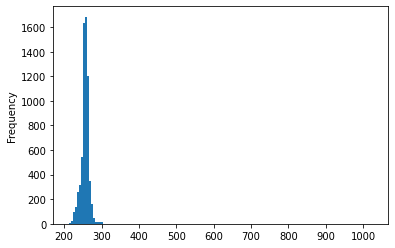

In [12]:
filtered_mdf["L1_TDC_sum"].plot.hist(bins=150)

## Method to remove outliers from data frame

`MuonDataFrameObject.removeOutliers()`

This method removes any event that is in the 1th and 99th percentile. An example of usage is shown below:

In [13]:
mdf1 = MuonDataFrame(ifile)
mdf1.removeOutliers()
mdf1.events_df

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
0             0 2020-09-11 15:02:02.304864       417     107.0     135.0   
3             3 2020-09-11 15:02:02.568066      1139     131.0     112.0   
6             6 2020-09-11 15:02:02.840124      1253     139.0     107.0   
8             8 2020-09-11 15:02:03.037983       993     106.0     141.0   
13           13 2020-09-11 15:02:03.778007       599     119.0     129.0   
...         ...                        ...       ...       ...       ...   
9972       9972 2020-09-11 15:19:31.920810       972     105.0     140.0   
9979       9979 2020-09-11 15:19:32.840649      1212     133.0     112.0   
9988       9988 2020-09-11 15:19:33.710813      1004     122.0     130.0   
9991       9991 2020-09-11 15:19:34.250778       824     110.0     146.0   
9995       9995 2020-09-11 15:19:34.650773       857     110.0     145.0   

      TDC_L2_L  TDC_L2_R                                            ADC  \
0        127.0     130.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
3        123.0     127.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
6        134.0     114.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
8        140.0     112.0  [9, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]   
13       126.0     121.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
...        ...       ...                                            ...   
9972     117.0     125.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9979     133.0     114.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9988     126.0     129.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9991     136.0     121.0  [1, 33, 34, 35, 31, 22, 28, 7, 9, 18, 18, 24]   
9995     117.0     145.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                                    TDC  numChannelsRead  \
0              [[0, 107], [1, 135], [3, 127], [4, 130]]                4   
3              [[0, 131], [1, 112], [3, 123], [4, 127]]                4   
6     [[0, 139], [1, 107], [3, 20], [3, 134], [4, 23...                4   
8              [[0, 106], [1, 141], [3, 140], [4, 112]]                4   
13             [[0, 119], [1, 129], [3, 126], [4, 121]]                4   
...                                                 ...              ...   
9972           [[0, 105], [1, 140], [3, 117], [4, 125]]                4   
9979           [[0, 133], [1, 112], [3, 133], [4, 114]]                4   
9988           [[0, 122], [1, 130], [3, 126], [4, 129]]                4   
9991           [[0, 110], [1, 146], [3, 136], [4, 121]]                4   
9995           [[0, 110], [1, 145], [3, 117], [4, 145]]                4   

        L1_asym    L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff  \
0    -11.570248  -1.167315       242.0       257.0        -28.0         -3.0   
3      7.818930  -1.600000       243.0       250.0         19.0         -4.0   
6     13.008130   8.064516       246.0       248.0         32.0         20.0   
8    -14.170040  11.111111       247.0       252.0        -35.0         28.0   
13    -4.032258   2.024291       248.0       247.0        -10.0          5.0   
...         ...        ...         ...         ...          ...          ...   
9972 -14.285714  -3.305785       245.0       242.0        -35.0         -8.0   
9979   8.571429   7.692308       245.0       247.0         21.0         19.0   
9988  -3.174603  -1.176471       252.0       255.0         -8.0         -3.0   
9991 -14.062500   5.836576       256.0       257.0        -36.0         15.0   
9995 -13.725490 -10.687023       255.0       262.0        -35.0        -28.0   

       TDC_hit_num  
0     [1, 1, 1, 1]  
3     [1, 1, 1, 1]  
6     [1, 1, 2, 2]  
8     [1, 1, 1, 1]  
13    [1, 1, 1, 1]  
...            ...  
9972  [1, 1, 1, 1]  
9979  [1, 1, 1, 1]  
9988  [1, 1, 1, 1]  
9991  [1, 1, 1, 1]  
9995  [1, 1, 1, 1]  

[2434 rows x 17 columns]

## Method to remove events with no TDC values from data frame

`MuonDataFrameObject.removeNoTDCEvents()`

This method removes any event that did not register any TDC value. An example of usage is shown below:

In [14]:
mdf1 = MuonDataFrame(ifile)
mdf1.removeNoTDCEvents()
mdf1.events_df

event_num                 event_time  deadtime  TDC_L1_L  TDC_L1_R  \
0             0 2020-09-11 15:02:02.304864       417     107.0     135.0   
1             1 2020-09-11 15:02:02.357801       869     122.0     131.0   
3             3 2020-09-11 15:02:02.568066      1139     131.0     112.0   
4             4 2020-09-11 15:02:02.676856       428     110.0     138.0   
5             5 2020-09-11 15:02:02.758275       942     141.0     101.0   
...         ...                        ...       ...       ...       ...   
9993       9993 2020-09-11 15:19:34.451120       974     109.0     120.0   
9994       9994 2020-09-11 15:19:34.551038       936     157.0     106.0   
9995       9995 2020-09-11 15:19:34.650773       857     110.0     145.0   
9998       9998 2020-09-11 15:19:34.980705       827     102.0     155.0   
9999       9999 2020-09-11 15:19:35.070830      2692       NaN     134.0   

      TDC_L2_L  TDC_L2_R                                            ADC  \
0        127.0     130.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
1          NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
3        123.0     127.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
4          NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
5          NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
...        ...       ...                                            ...   
9993       NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9994       NaN       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9995     117.0     145.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9998     144.0       NaN  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   
9999     142.0     112.0  [1, 33, 34, 35, 31, 22, 28, 7, 8, 18, 18, 24]   

                                           TDC  numChannelsRead    L1_asym  \
0     [[0, 107], [1, 135], [3, 127], [4, 130]]                4 -11.570248   
1                         [[0, 122], [1, 131]]                2  -3.557312   
3     [[0, 131], [1, 112], [3, 123], [4, 127]]                4   7.818930   
4                         [[0, 110], [1, 138]]                2 -11.290323   
5                         [[0, 141], [1, 101]]                2  16.528926   
...                                        ...              ...        ...   
9993                      [[0, 109], [1, 120]]                2  -4.803493   
9994                      [[0, 157], [1, 106]]                2  19.391635   
9995  [[0, 110], [1, 145], [3, 117], [4, 145]]                4 -13.725490   
9998            [[0, 102], [1, 155], [3, 144]]                3 -20.622568   
9999            [[1, 134], [3, 142], [4, 112]]                3        NaN   

        L2_asym  L1_TDC_sum  L2_TDC_sum  L1_TDC_diff  L2_TDC_diff  \
0     -1.167315       242.0       257.0        -28.0         -3.0   
1           NaN       253.0         NaN         -9.0          NaN   
3     -1.600000       243.0       250.0         19.0         -4.0   
4           NaN       248.0         NaN        -28.0          NaN   
5           NaN       242.0         NaN         40.0          NaN   
...         ...         ...         ...          ...          ...   
9993        NaN       229.0         NaN        -11.0          NaN   
9994        NaN       263.0         NaN         51.0          NaN   
9995 -10.687023       255.0       262.0        -35.0        -28.0   
9998        NaN       257.0         NaN        -53.0          NaN   
9999  11.811024         NaN       254.0          NaN         30.0   

       TDC_hit_num  
0     [1, 1, 1, 1]  
1     [1, 1, 0, 0]  
3     [1, 1, 1, 1]  
4     [1, 1, 0, 0]  
5     [1, 1, 0, 0]  
...            ...  
9993  [1, 1, 0, 0]  
9994  [1, 1, 0, 0]  
9995  [1, 1, 1, 1]  
9998  [1, 1, 1, 0]  
9999  [0, 1, 1, 1]  

[7337 rows x 17 columns]

## Data Plotting Methods

### Plotting 1 D histogram
`MuonDataFrameObject.getHistogram(query_term)`

The following example shows how to plot the histogram for *L1_TDC_sum*

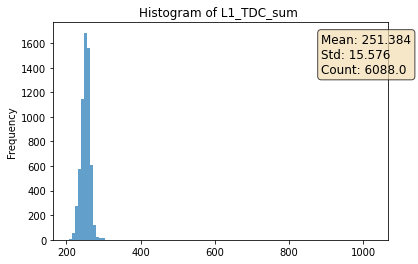

In [15]:
mdf.getHistogram("L1_TDC_sum")

### Plotting Kernel Density Estimation (KDE) graph
`MuonDataFrameObject.getKDE(query_term)`

The following example shows how to plot the histogram for *L1_TDC_sum*

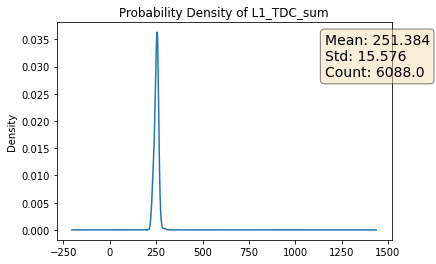

In [16]:
mdf.getKDE("L1_TDC_sum")

### Plotting Trimmed 1 D histogram
`MuonDataFrameObject.getTrimmedHistogram(query_term, num_std_dev)`


The following example shows how to plot the histogram for *L1_TDC_sum* with events within 3 standard deviations

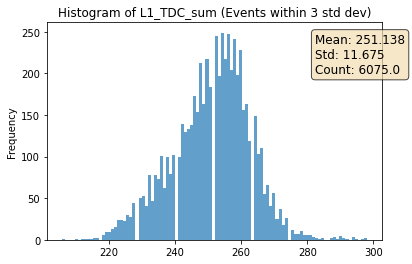

In [17]:
mdf.getTrimmedHistogram("L1_TDC_sum", 3)

### Plotting Comparable 1 D histograms
`MuonDataFrameObject.getComparableHistogram([query_term1, query_term2])`


The following example shows how to plot two comparable histograms for *L1_TDC_sum* and *L2_TDC_sum*

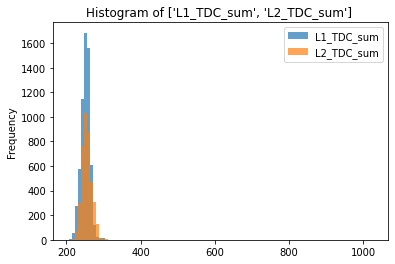

In [18]:
mdf.getComparableHistogram(["L1_TDC_sum", "L2_TDC_sum"])

### Plotting Trimmed Comparable 1 D histograms
`MuonDataFrameObject.getTrimmedComparableHistogram([query_term1, query_term2], num_std_dev)`

The following example shows how to plot two comparable histograms for *L1_TDC_sum* and *L2_TDC_sum* with events with 3 standard deviations 

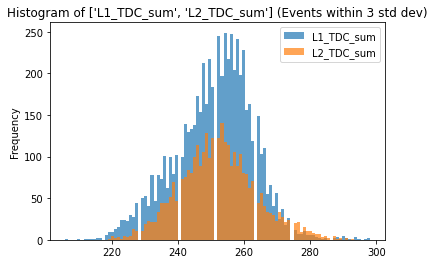

In [19]:
mdf.getTrimmedComparableHistogram(["L1_TDC_sum", "L2_TDC_sum"], 3)

### Plotting Filtered 1 D histograms
`MuonDataFrameObject.getFilteredHistogram([query_term1, query_term2])`

The following example shows how to plot histograms for *L1_TDC_sum* against different values of *numChannelsRead*

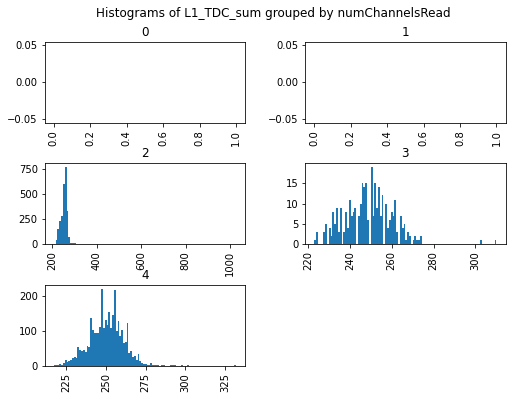

In [20]:
plt.rcParams['figure.figsize'] = [8, 6]
mdf.getFilteredHistogram("L1_TDC_sum", "numChannelsRead")

### Plotting Time Series Plots
`MuonDataFrameObject.getPlot(query_term)`

The following example shows how to plot time series plots of *deadtime*

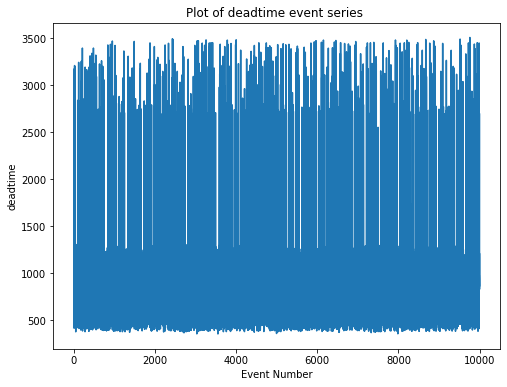

In [21]:
mdf.getPlot("deadtime")

### Plotting Time Scatter Plots
`MuonDataFrameObject.getScatterPlot([query_term1, query_term2])`

The following example shows how to plot time scatter plot of *L1_asym* against *L2_asym*

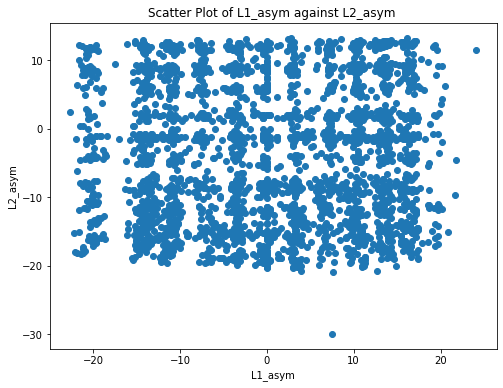

In [22]:
mdf.getScatterPlot(["L1_asym", "L2_asym"])

### Plotting Time Scatter Plots
`MuonDataFrameObject.get3DScatterPlot([query_term1, query_term2, query_term3])`

The following example shows how to plot time scatter plot of *L1_asym* against *L2_asym* with the color axis representing *L1_TDC_sum*

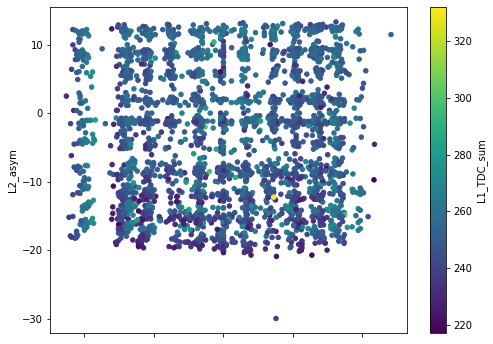

In [23]:
mdf.get3DScatterPlot(["L1_asym", "L2_asym", "L1_TDC_sum"])

### Generating Histogram of Multiple TDC Hits
`MuonDataFrameObject.getMultipleTDCHitReport()`


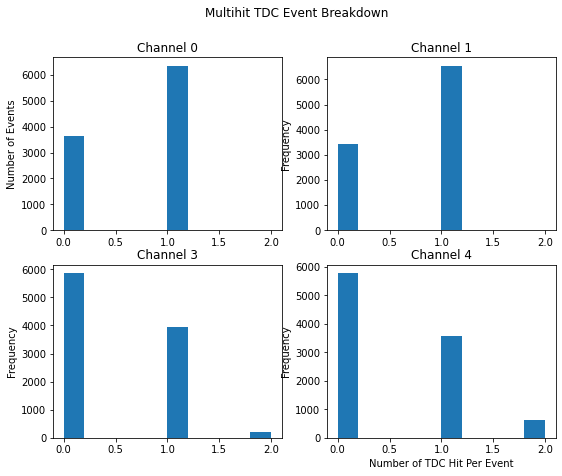

In [24]:
mdf.getMultipleTDCHitReport()

## TO DO LIST

- implement methods that updates all TDC columns using some TDC value
    - first TDC
    - max TDC
    - min TDC
- generate report method
- any more data filtering method
- implement Igor 2D histo
- Bell curve fit of histo
- Recreate of all graphs
- Plots of arrays from columns